In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Switch off future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv('housing.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
features = df.columns[1:]

# Convert categorical variables to dummy/indicator variables
df_encoded = pd.get_dummies(df[features])

# Fill NaN values with the mean of each column
df_encoded = df_encoded.fillna(df_encoded.mean())

# Extract the values
X = df_encoded.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Ensure all values in scaled_data are finite
if not np.all(np.isfinite(scaled_data)):
	raise ValueError("scaled_data contains non-finite values")

# Use Ward's method or another appropriate method
linkage_matrix = linkage(scaled_data, method='ward')

In [18]:
df_encoded.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,False,False,False,True,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,False,False,False,True,False,False,False,False,True,False


In [14]:
results = []

for k in range(2, 11):  # from 2 to 10 clusters
    # Assign cluster labels
    cluster_labels = fcluster(linkage_matrix, k, criterion='maxclust')
    
    # Calculate metrics
    sil_score = silhouette_score(scaled_data, cluster_labels)
    db_score  = davies_bouldin_score(scaled_data, cluster_labels)
    ch_score  = calinski_harabasz_score(scaled_data, cluster_labels)
    
    # Append to results list
    results.append({
        'k': k,
        'silhouette': sil_score,
        'davies_bouldin': db_score,
        'calinski_harabasz': ch_score
    })

# Convert list of dicts to a DataFrame
results_df = pd.DataFrame(results)
results_df

,k,silhouette,davies_bouldin,calinski_harabasz
0,2,0.026539,3.846433,67.038661
1,3,0.022901,5.252770,47.225257
2,4,0.021515,4.856445,37.936030
3,5,-0.010466,4.504024,33.199796
4,6,-0.004170,4.234869,30.017349
5,7,-0.002311,3.784774,27.760917
6,8,-0.001087,3.532981,26.144990
7,9,0.000448,3.289165,24.857662
8,10,0.003292,3.258942,23.802880


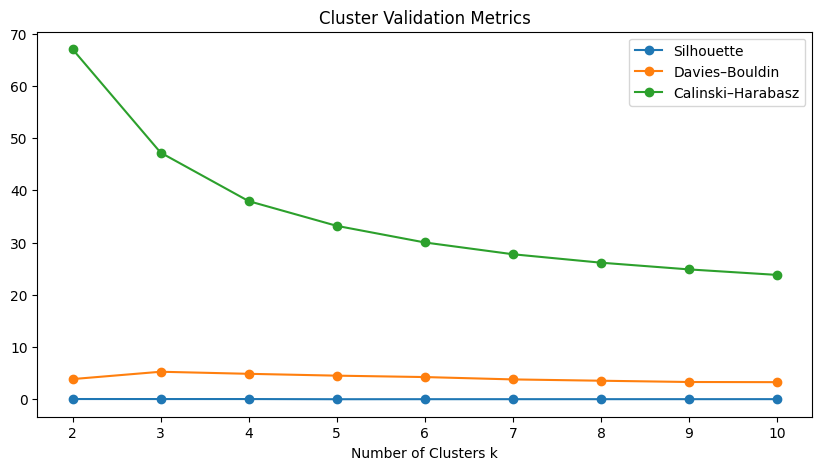

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(results_df['k'], results_df['silhouette'], marker='o', label='Silhouette')
plt.plot(results_df['k'], results_df['davies_bouldin'], marker='o', label='Davies–Bouldin')
plt.plot(results_df['k'], results_df['calinski_harabasz'], marker='o', label='Calinski–Harabasz')
plt.xticks(range(2, 11))
plt.title('Cluster Validation Metrics')
plt.xlabel('Number of Clusters k')
plt.legend()
plt.show()

Explained variance by PC1 and PC2: [0.0649906  0.02888941]


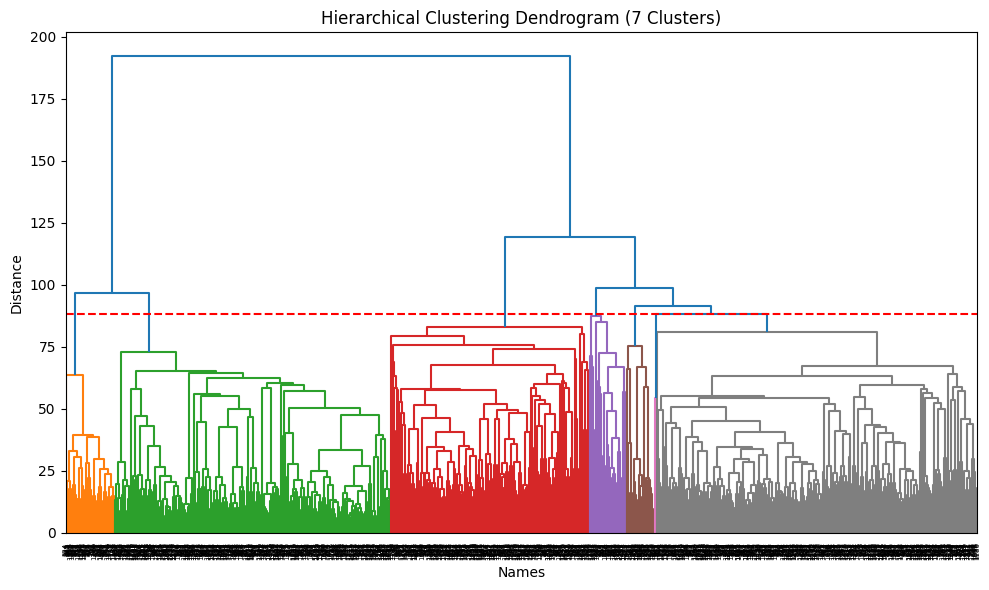

In [29]:
# 3. PCA with 2 components (for visualization)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# (Optional) Show how much variance is explained by PC1 and PC2
explained_variance = pca.explained_variance_ratio_
print("Explained variance by PC1 and PC2:", explained_variance)

# 4. Hierarchical Clustering (Ward’s method)
linkage_matrix = linkage(scaled_data, method='ward')

# 5. (Optional) Decide on a cut. 
#    For example, to produce up to 7 clusters, use `t=7` with `criterion='maxclust'`.
cluster_labels = fcluster(linkage_matrix, t=7, criterion='maxclust')

k = 7
distance_threshold = linkage_matrix[-(k - 1), 2]

# 3. Plot dendrogram with color_threshold
plt.figure(figsize=(10, 6))
dendrogram(
    linkage_matrix,
    labels=df.iloc[:, 0].values,
    leaf_rotation=90,
    color_threshold=distance_threshold  # forces coloring at the distance for 7 clusters
)
plt.axhline(y=distance_threshold, color='red', linestyle='--')  # optional horizontal line
plt.title('Hierarchical Clustering Dendrogram (7 Clusters)')
plt.xlabel('Names')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

In [17]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for the 2 PCA components
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
pca_df['Id'] = df.iloc[:, 0].values  # bring back the names
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio by PC1 & PC2:", explained_variance)

Explained variance ratio by PC1 & PC2: [0.0649906  0.02888942]


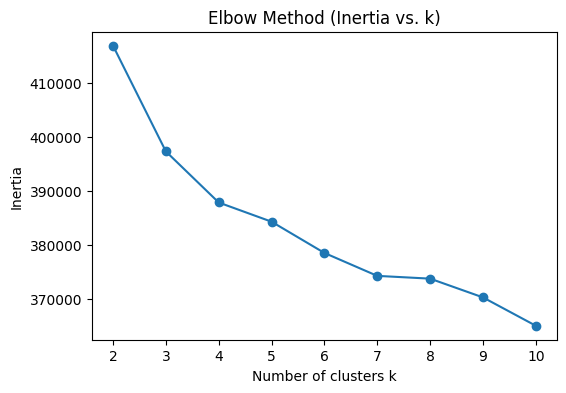

In [19]:
inertias = []
K_values = range(2, 11)  # Try k=2 to k=10

for k in K_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(6,4))
plt.plot(K_values, inertias, marker='o')
plt.title('Elbow Method (Inertia vs. k)')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.show()

In [24]:
best_k = 7
kmeans = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to your PCA DataFrame
pca_df['Cluster'] = final_labels

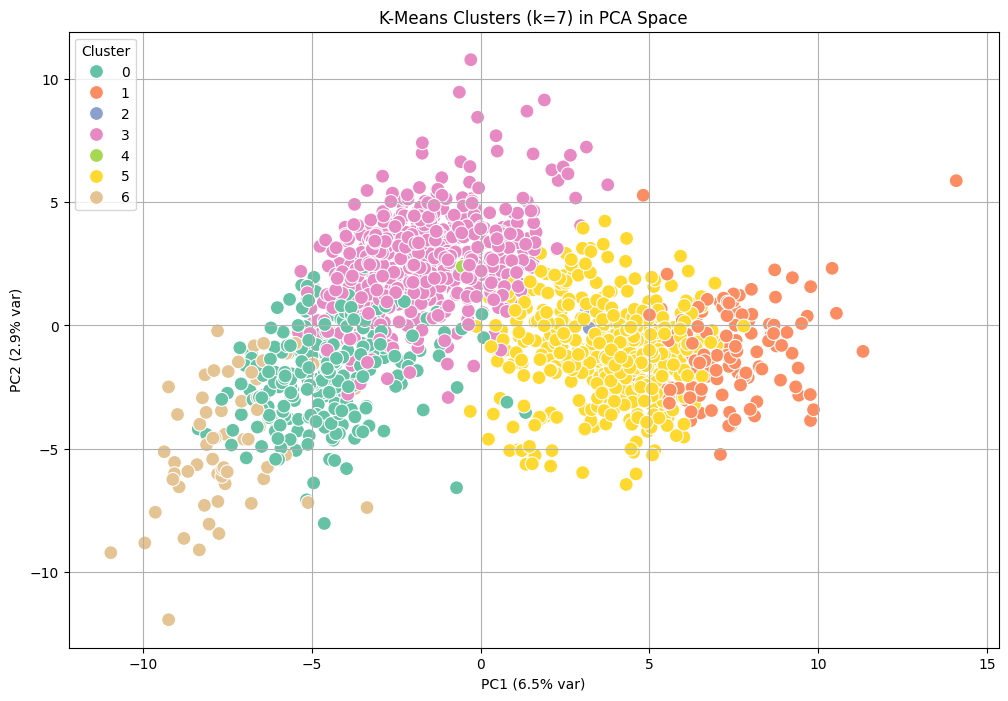

In [27]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Cluster', 
    data=pca_df, 
    palette='Set2', 
    s=100
)


plt.title(f'K-Means Clusters (k={best_k}) in PCA Space')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% var)')
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% var)')
plt.grid(True)
plt.show()

In [32]:

import pandas as pd

# Extract scaled centroids
centroids_scaled = kmeans.cluster_centers_

# Reverse the scaling
centroids_unscaled = scaler.inverse_transform(centroids_scaled)

# Create a DataFrame for easy interpretation
centroids_df = pd.DataFrame(centroids_unscaled, columns=df_encoded.columns)
centroids_df.index = [f"Cluster_{i}" for i in range(kmeans.n_clusters)]

print(centroids_df)

           MSSubClass  LotFrontage       LotArea  OverallQual  OverallCond  \
Cluster_0   56.867704    62.926261   8759.299611     5.350195     6.346304   
Cluster_1   46.000000    86.526249  13359.366667     8.416667     5.000000   
Cluster_2   60.000000    73.024979   9372.000000     6.500000     6.000000   
Cluster_3   50.374332    71.119152  11677.643494     5.426025     5.780749   
Cluster_4   90.000000    70.049958  18890.000000     5.000000     5.000000   
Cluster_5   65.087912    69.344058   9599.340659     6.969231     5.149451   
Cluster_6   75.781250    63.316403   8497.078125     4.484375     4.781250   

             YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
Cluster_0  1927.972763   1972.120623   14.334630  185.338521   22.136187  ...   
Cluster_1  2005.741667   2006.283333  323.739044  824.008333    4.491667  ...   
Cluster_2  1993.000000   1998.000000   60.000000  414.000000    0.000000  ...   
Cluster_3  1966.121212   1975.980392   91.245428  5

In [35]:
loadings = pd.DataFrame(pca.components_, columns=df_encoded.columns, 
                        index=['PC1','PC2'])
loadings

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
PC1,-0.006238,0.064850,0.033459,0.185151,-0.055014,0.196236,0.162269,0.099263,0.076874,-0.016773,...,-0.008497,0.103109,-0.006783,-0.070060,-0.028871,-0.015231,-0.008355,-0.009222,-0.048615,0.102230
PC2,-0.111580,0.081543,0.098876,-0.045439,0.038458,0.029714,-0.059851,0.024914,0.151268,0.120818,...,-0.023380,-0.086547,0.002109,0.065609,0.000940,-0.011107,0.014601,0.005917,0.057220,-0.084422


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = df_encoded  # use all encoded features
y = pca_df['Cluster']  # cluster labels from K-Means

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=df_encoded.columns).sort_values(ascending=False)
print(importances)

YearBuilt              0.094696
GarageYrBlt            0.065843
YearRemodAdd           0.040608
Foundation_CBlock      0.036445
Foundation_PConc       0.032091
                         ...   
Exterior1st_BrkComm    0.000000
Utilities_NoSeWa       0.000000
RoofMatl_Tar&Grv       0.000000
GarageCond_Gd          0.000000
Electrical_Mix         0.000000
Length: 288, dtype: float64
